In [2]:
import h5py
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch

In [17]:
gf = h5py.File('/fast_scratch/QVAE/data/atlas_dataset2and3/dataset_2_1.hdf5', 'r')
pf = h5py.File('/fast_scratch/QVAE/data/atlas_dataset2and3/dataset_2_1_scaled.hdf5', 'r')

In [18]:
print(gf.keys())

<KeysViewHDF5 ['incident_energies', 'showers']>


In [19]:
showers = torch.tensor(gf["showers"][:])
incident_energies = torch.tensor(gf["incident_energies"][:])
scaled_showers = torch.tensor(pf["showers"])

In [6]:
ty = torch.unique(torch.tensor(incident_energies))
print(incident_energies[30])
print(torch.sum(torch.tensor(showers[30])))
print(torch.sum(torch.tensor(scaled_showers[30])))
print(showers.shape, incident_energies.shape, scaled_showers.shape)

tensor([32220.3223], dtype=torch.float64)
tensor(24603.2673, dtype=torch.float64)
tensor(244.4453, dtype=torch.float64)
torch.Size([100000, 6480]) torch.Size([100000, 1]) torch.Size([100000, 6480])


/tmp/ipykernel_55636/2156708843.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ty = torch.unique(torch.tensor(incident_energies))
/tmp/ipykernel_55636/2156708843.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.sum(torch.tensor(showers[30])))
/tmp/ipykernel_55636/2156708843.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.sum(torch.tensor(scaled_showers[30])))


In [ ]:
plt.hist(torch.log1p(torch.tensor(showers)), density=True, bins=100)
plt.show()

In [10]:
layers = 45
D2_lower_lim = np.array([9*16*i for i in range(45)])
D2_upper_lim = np.array([9*16*i for i in range(1, 46)])
test_lower = [0]
test_upper = [6480]

def Get_Sparsity(pions1_voxels, lower_lim, upper_lim, layers):

    #layers_sparsities = np.zeros((pions1_voxels.shape[0], len(pion_layers)-1), dtype=np.float32)
    layer_datasets = [pions1_voxels[0][start_idx:end_idx] for start_idx, end_idx in zip(lower_lim, upper_lim)]
    layer_sp = [abs(np.count_nonzero(layer_dataset)/layer_dataset.shape[0]-1) for layer_dataset in layer_datasets]
    data_sparsities = torch.tensor(layer_sp)

    for i in range(1, pions1_voxels.shape[0]): #looping over all events
        layer_datasets = [pions1_voxels[i][start_idx:end_idx] for start_idx, end_idx in zip(lower_lim, upper_lim)]
        layer_sp = [abs(np.count_nonzero(layer_dataset)/layer_dataset.shape[0]-1) for layer_dataset in layer_datasets]
        data_sparsities = torch.cat((data_sparsities, torch.tensor(layer_sp)), dim=0)
    if len(lower_lim) == 1:
        return data_sparsities
    else:
        data_sparsities = data_sparsities.reshape(pions1_voxels.shape[0], layers)
    return data_sparsities


In [ ]:
sp = Get_Sparsity(showers, test_lower, test_upper, layers)

In [ ]:
print(sp.shape)
#sp2 = torch.sum(sp, dim=1)
#print(torch.sum(sp, dim=1).shape)

In [ ]:
plt.hist(sp, bins=100, density = True)
plt.xlabel("Sparsity")
plt.ylabel("PDF")
plt.xlim(0.0, 1.0)
plt.show()

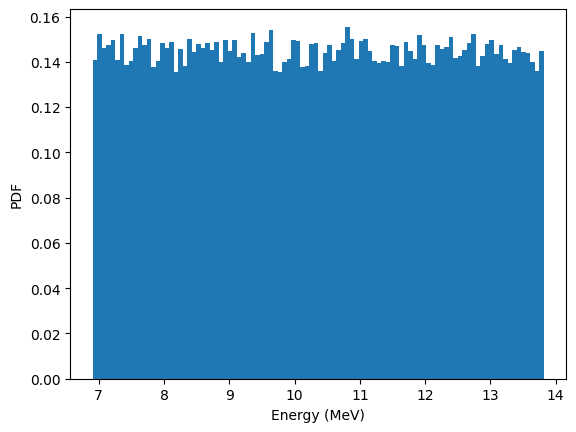

In [15]:
plt.hist(torch.log(torch.tensor(incident_energies).squeeze(dim=1)), bins=100, density = True)
plt.xlabel("Energy (MeV)")
plt.ylabel("PDF")
plt.show()

In [16]:
scaled_sp = Get_Sparsity(scaled_showers, test_lower, test_upper, layers)

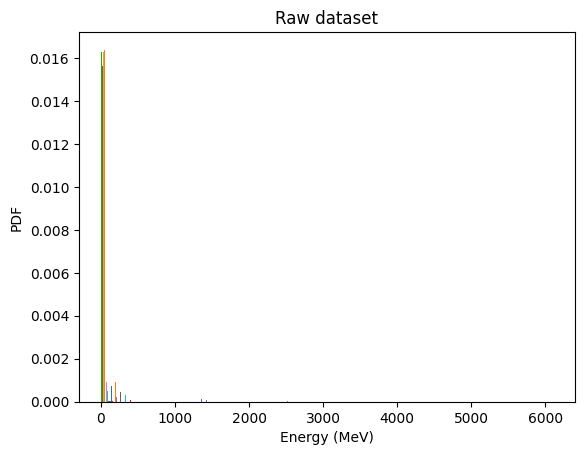

In [43]:
plt.hist(showers[:], bins=100, density = True)
plt.xlabel("Energy (MeV)")
plt.ylabel("PDF")
plt.title("Raw dataset")
plt.show()

In [ ]:
plt.hist(torch.log1p(showers/torch.sum(torch.tensor(showers), dim=1).unsqueeze(dim=1)), bins=100, density = True)
plt.xlabel("Energy (MeV)")
plt.ylabel("PDF")
plt.title("Logarithm of dataset")
plt.show()

/tmp/ipykernel_55636/485747380.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.hist(torch.log1p(showers/torch.sum(torch.tensor(showers), dim=1).unsqueeze(dim=1)), bins=100, density = True)


In [27]:
print(torch.sum(torch.tensor(scaled_showers), dim=0))

/tmp/ipykernel_15518/1702385349.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:230.)
  print(torch.sum(torch.tensor(scaled_showers), dim=0))


tensor([500401.7819, 248030.8632, 226465.6710,  ...,  41625.0712,
         42082.1246,  38702.2444], dtype=torch.float64)


In [3]:
he = h5py.File('/fast_scratch/QVAE/data/atlas_dataset2and3/dataset_3_1.hdf5', 'r')
llo = h5py.File('/fast_scratch/QVAE/data/atlas_dataset2and3/dataset_3_1_scaled.hdf5', 'r')

In [4]:
print(he.keys())

<KeysViewHDF5 ['incident_energies', 'showers']>


In [5]:
showers3 = torch.tensor(he["showers"][:])
incident_energies3 = torch.tensor(he["incident_energies"][:])
scaled_showers3 = torch.tensor(llo["showers"])

/tmp/ipykernel_47630/3247250164.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:230.)
  scaled_showers3 = torch.tensor(llo["showers"])


In [6]:
ty3 = torch.unique(torch.tensor(incident_energies3))
print(ty3.shape)
print(incident_energies3[30])
print(torch.sum(torch.tensor(showers3[30])))
print(torch.sum(torch.tensor(scaled_showers3[30])))
print(showers3.shape, incident_energies3.shape, scaled_showers3.shape)

/tmp/ipykernel_47630/4289140888.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ty3 = torch.unique(torch.tensor(incident_energies3))


torch.Size([49999])
tensor([1499.9915], dtype=torch.float64)


/tmp/ipykernel_47630/4289140888.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.sum(torch.tensor(showers3[30])))
/tmp/ipykernel_47630/4289140888.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.sum(torch.tensor(scaled_showers3[30])))


tensor(1843.6715, dtype=torch.float64)
tensor(60.8703, dtype=torch.float64)
torch.Size([50000, 40500]) torch.Size([50000, 1]) torch.Size([50000, 40500])


/tmp/ipykernel_47630/4036017167.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.hist(torch.tensor(incident_energies3).squeeze(dim=1), bins=100, density = True)


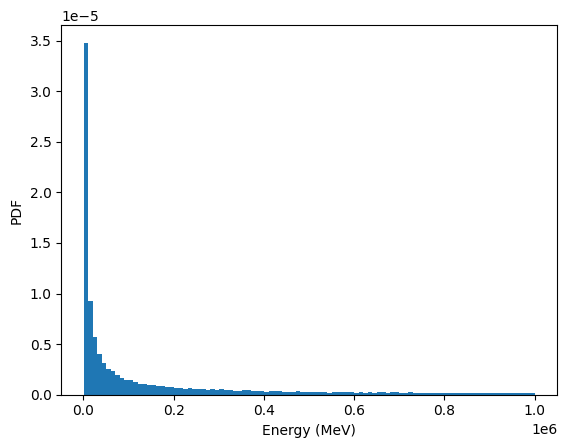

In [7]:
plt.hist(torch.tensor(incident_energies3).squeeze(dim=1), bins=100, density = True)
plt.xlabel("Energy (MeV)")
plt.ylabel("PDF")
plt.show()

In [11]:
D3_layers = 45
D3_lower_lim = np.array([18*50*i for i in range(45)])
D3_upper_lim = np.array([18*50*i for i in range(1, 46)])
test_lower_D3 = [0]
test_upper_D3 = [18*50*45]

In [12]:
sp3 = Get_Sparsity(showers3, test_lower_D3, test_upper_D3, D3_layers)

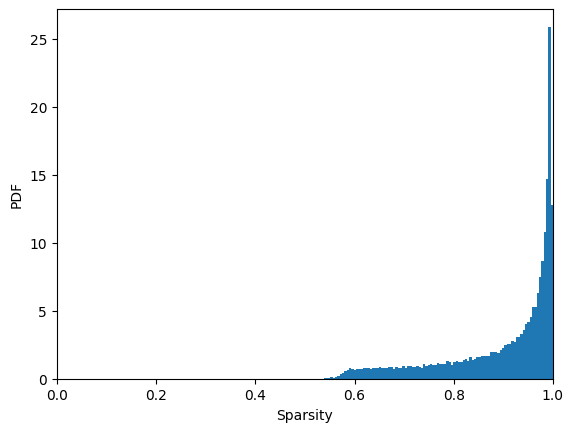

In [14]:
plt.hist(sp3, bins=100, density = True)
plt.xlabel("Sparsity")
plt.ylabel("PDF")
plt.xlim(0.0, 1.0)
plt.show()